# Model 2: handpicked features, outliers removed

This model (logistic regression) uses features that have been handpicked based on their Pearson's Product Moment Coefficients with diagnosis shown in the correltaion matrix (in my notebook Amber_data_exploration).

These are as follows, in descending order:
* concave points_worst, 0.79
* concave points_mean, 0.78
* radius_worst, 0.78
* perimeter_worst, 0.78
* area_worst, 0.78
* perimeter_mean, 0.74
* area_mean, 0.71
* radius_mean, 0.73
* concavity_mean, 0.7

The rest of the features have been dropped as they were not strongly correlated to diagnosis.

**This model uses data that has had the outliers removed. There are 524 total records (instead of the original 569).**

In [1]:
# load in the relevant libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load in the csv file created in Amber_model1_HPF_with_outliers notebook
# this contains only the features of interest and no outliers
handpicked_predictors_outliers_removed = pd.read_csv("C:/Users/alsaw/OneDrive/Documents/2019-20 post India/Coding/CFG - python/Final Project/Team2_final_project/Data/Interim/handpicked_predictors_outliers_removed.csv")

In [3]:
handpicked_predictors_outliers_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 11 columns):
Unnamed: 0              524 non-null int64
one_hot_diagnosis       524 non-null int64
concave points_worst    524 non-null float64
concave points_mean     524 non-null float64
radius_worst            524 non-null float64
perimeter_worst         524 non-null float64
area_worst              524 non-null float64
perimeter_mean          524 non-null float64
area_mean               524 non-null float64
radius_mean             524 non-null float64
concavity_mean          524 non-null float64
dtypes: float64(9), int64(2)
memory usage: 45.2 KB


In [4]:
handpicked_predictors_outliers_removed.head()

,Unnamed: 0,one_hot_diagnosis,concave points_worst,concave points_mean,radius_worst,perimeter_worst,area_worst,perimeter_mean,area_mean,radius_mean,concavity_mean
0,2,1,0.2430,0.12790,23.57,152.50,1709.0,130.00,1203.0,19.69,0.1974
1,3,1,0.2575,0.10520,14.91,98.87,567.7,77.58,386.1,11.42,0.2414
2,4,1,0.1625,0.10430,22.54,152.20,1575.0,135.10,1297.0,20.29,0.1980
3,5,1,0.1741,0.08089,15.47,103.40,741.6,82.57,477.1,12.45,0.1578
4,6,1,0.1932,0.07400,22.88,153.20,1606.0,119.60,1040.0,18.25,0.1127


In [5]:
# removing Unnamed: 0
handpicked_predictors_outliers_removed = handpicked_predictors_outliers_removed.drop("Unnamed: 0", axis=1)

In [6]:
handpicked_predictors_outliers_removed.head()
# correct

,one_hot_diagnosis,concave points_worst,concave points_mean,radius_worst,perimeter_worst,area_worst,perimeter_mean,area_mean,radius_mean,concavity_mean
0,1,0.2430,0.12790,23.57,152.50,1709.0,130.00,1203.0,19.69,0.1974
1,1,0.2575,0.10520,14.91,98.87,567.7,77.58,386.1,11.42,0.2414
2,1,0.1625,0.10430,22.54,152.20,1575.0,135.10,1297.0,20.29,0.1980
3,1,0.1741,0.08089,15.47,103.40,741.6,82.57,477.1,12.45,0.1578
4,1,0.1932,0.07400,22.88,153.20,1606.0,119.60,1040.0,18.25,0.1127


In [7]:
# counting benign
handpicked_predictors_outliers_removed.loc[handpicked_predictors_outliers_removed.one_hot_diagnosis == 0, "one_hot_diagnosis"].count()

# 354 benign 

354

In [8]:
# counting malignant
handpicked_predictors_outliers_removed.loc[handpicked_predictors_outliers_removed.one_hot_diagnosis == 1, "one_hot_diagnosis"].count()

# 170 malignant

170

### Model 2: logistic regression on handpicked features excluding outliers

Let's see if removing the outliers has an effect on model performance.

In [9]:
# splitting the target from predictors

# creating x data containing features only
x_data = handpicked_predictors_outliers_removed.drop("one_hot_diagnosis", axis=1)
# creating y data containing target only
y_data = handpicked_predictors_outliers_removed["one_hot_diagnosis"]

In [10]:
x_data.head()

,concave points_worst,concave points_mean,radius_worst,perimeter_worst,area_worst,perimeter_mean,area_mean,radius_mean,concavity_mean
0,0.2430,0.12790,23.57,152.50,1709.0,130.00,1203.0,19.69,0.1974
1,0.2575,0.10520,14.91,98.87,567.7,77.58,386.1,11.42,0.2414
2,0.1625,0.10430,22.54,152.20,1575.0,135.10,1297.0,20.29,0.1980
3,0.1741,0.08089,15.47,103.40,741.6,82.57,477.1,12.45,0.1578
4,0.1932,0.07400,22.88,153.20,1606.0,119.60,1040.0,18.25,0.1127


In [11]:
y_data.head()

0    1
1    1
2    1
3    1
4    1
Name: one_hot_diagnosis, dtype: int64

In [12]:
# importing split function
from sklearn.model_selection import train_test_split

In [13]:
# splitting the data using stratified split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, test_size=0.2, random_state=0, stratify=y_data)

In [14]:
# checking length of train set
# should be around 419 as this is 80% of 524
len(x_train)

# correct

419

In [15]:
# checking length of train set
# should be around 105 as this is 20% of 524
len(x_test)

# correct

105

In [16]:
# checking length of train set
# should be around 419 as this is 80% of 524
len(y_train)

# correct

419

In [17]:
# checking length of train set
# should be around 105 as this is 20% of 524
len(y_test)

# correct

105

#### Now to scale the data

In [18]:
# importing function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
# fit on training set only
# fit on x_train only as it contains the features
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
# apply transform to both the training and test
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
# checking transformation worked
print(x_train)

# looks like it did

[[ 1.97805584e+00  1.22879100e+00 -1.10184546e-01 ... -5.30192092e-02
   6.18020065e-02  2.21822552e+00]
 [ 5.14708423e-01 -4.59984229e-01 -2.21359616e-03 ... -1.89815188e-01
  -1.09283680e-01  4.08570878e-01]
 [ 1.67356861e-01 -2.75559045e-01 -3.70894888e-01 ... -3.37044758e-01
  -2.41962376e-01 -6.11180846e-01]
 ...
 [-5.66380322e-01 -3.69885859e-01 -2.49756749e-01 ... -2.78307502e-01
  -1.65148394e-01 -4.86868255e-01]
 [ 1.88176036e+00  2.73314104e+00  2.30204448e+00 ...  2.48079783e+00
   2.32083138e+00  1.42994125e+00]
 [ 1.50161240e-01  2.14940385e-01 -1.41900313e+00 ... -1.34292027e+00
  -1.57503411e+00  1.97057153e+00]]


#### Now for logistic regression

In [22]:
# import the model we want to use
from sklearn.linear_model import LogisticRegression

In [23]:
# setting the solver cos Jupyter didn't like it
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [24]:
# training the model on the data - model is learning the relationship between features and classes
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# now to apply it to the test data
# model will predict the class based on what it has learned in the training
predictions = logisticRegr.predict(x_test)

In [26]:
print(predictions)
# can see it has predicted classes for the test data

[1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0
 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1]


#### Assessing model performance

For our target variable of diagnosis, benign is the negative class (0) and malignant is the positive class (1).

Of the metrics used to assess model performance (accuracy, precision, recall), **recall seems the most appropriate for this data**.

* Accuracy: the proportion of predictions a model gets right (TP + TN / TP + TN + FP + FN)

* Precision: the proportion of positive predictions a model gets right (TP / TP + FP)

* Recall: the proportion of actual positives that were identified correctly (TP / TP + FN)

**As we are predicting disease, we want to minimise false negatives. A false negative would be a tumour being classified as benign when in fact it is malignant, and therefore the breast cancer would go undiagnosed. To minimise false negatives, we want to increase recall.**

Plus the fact that, in this dataset with outliers removed, we have 354:170 class distribution (benign:malignant). This is more imbalanced than when outliers were left in (42 malignant records have been removed, compared to only 3 benign records), so accuracy would be misleading.

In [27]:
# getting classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.94      0.88      0.91        34

    accuracy                           0.94       105
   macro avg       0.94      0.93      0.93       105
weighted avg       0.94      0.94      0.94       105



In [28]:
# creating a confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[69,  2],
       [ 4, 30]], dtype=int64)

Text(0.5, 15.0, 'Predicted class')

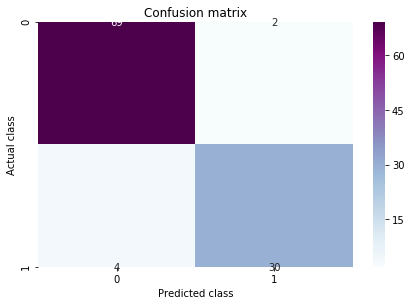

In [29]:
# making confusion matrix a heatmap

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

Predicted label 0 / actual label 0 = true negative  
Predicted label 0 / actual label 1 = false negative  
Predicted label 1 / actual label 1 = true positive  
Predicted label 1 / actual label 0 = false positive  

So this matrix is saying there are:
* 69 true negatives
* 4 false negatives
* 2 false positives
* 30 true positives

Pretty good but slightly worse than the model with outliers left in.

In [30]:
# try looking at the metrics for class 1 separately
# should be the same as classification report above, just makes it easier to read
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.9428571428571428
Precision: 0.9375
Recall: 0.8823529411764706


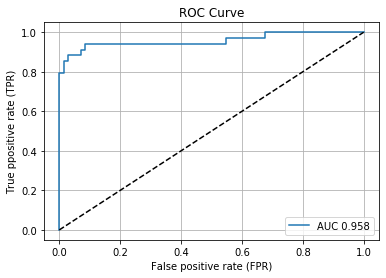

In [31]:
# attempting to plot an ROC curve

# first need to predict probability
# y_pred_proba is the predicted probability for a class in y_test dataset
# .predict_proba only gives the output of 1 in a binary classification (which is malignant, which is what we want)
# [:,1] also only gives the output for class 1
y_pred_proba = logisticRegr.predict_proba(x_test)[:,1]

# then this is plotting the ROC curve using y_test data (classes) and the predicted probability of getting class 1
# fpr is false positive rate on the x axis
# tpr is true positive rate on the y axis
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# calculating the AUC curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# plotting it on a graph

# plots x and y axes
plt.plot(fpr,tpr)
# plots legend as auc score
plt.legend(["AUC %.3f"%auc])
# plots labels / title
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True ppositive rate (TPR)")
plt.title("ROC Curve")
# adds a grid
plt.grid()
# adds the line for an AUC of 0.5, i.e. a useless classfier
plt.plot([0, 1], [0, 1], 'k--')
# shows plot
plt.show()

So to summarise

* The recall is lower for this model (0.88) than Model 1
* The F1 score is also pretty high for malignant (0.91), indicating there is a good balance of precision and recall (even though we are most interested in recall)
* The AUC score is 0.958, which is lower than Model 1, but a perfect classifer is 1 so still pretty good

## Go to my other notebook!

#### Amber_model3_PCA_with_outliers to see how feature selection through PCA affects model performance.